In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [7]:
# Himpunan pH
ph = ctrl.Antecedent(np.arange(0, 15, 0.1), 'pH')
ph['asam'] = fuzz.trimf(ph.universe, [0, 0, 6.5])
ph['netral'] = fuzz.trimf(ph.universe, [6.5, 8.5, 8.5])
ph['basa'] = fuzz.trimf(ph.universe, [8.5, 14, 14])

In [8]:
# Himpunan Temperatur
temperature = ctrl.Antecedent(np.arange(0, 100, 0.1), 'temperature')
temperature['dingin'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['sedang'] = fuzz.trimf(temperature.universe, [15, 25, 25])
temperature['panas'] = fuzz.trimf(temperature.universe, [25, 100, 100])

In [9]:
# Himpunan Konduktivitas Listrik
conductivity = ctrl.Antecedent(np.arange(0, 1000, 0.1), 'conductivity')
conductivity['rendah'] = fuzz.trimf(conductivity.universe, [0, 0, 250])
conductivity['sedang'] = fuzz.trimf(conductivity.universe, [250, 500, 500])
conductivity['tinggi'] = fuzz.trimf(conductivity.universe, [500, 1000, 1000])

In [10]:
# Himpunan Output
output = ctrl.Consequent(np.arange(0, 100, 0.1), 'output')
output['buruk'] = fuzz.trimf(output.universe, [0, 0, 40])
output['cukup'] = fuzz.trimf(output.universe, [30, 50, 70])
output['baik'] = fuzz.trimf(output.universe, [60, 100, 100])

In [11]:
# Aturan Fuzzy
rule1 = ctrl.Rule(ph['asam'] & temperature['dingin'] & conductivity['rendah'], output['buruk'])
rule2 = ctrl.Rule(ph['asam'] & temperature['sedang'] & conductivity['rendah'], output['buruk'])
rule3 = ctrl.Rule(ph['asam'] & temperature['panas'] & conductivity['rendah'], output['buruk'])

rule4 = ctrl.Rule(ph['netral'] & temperature['dingin'] & conductivity['rendah'], output['buruk'])
rule5 = ctrl.Rule(ph['netral'] & temperature['sedang'] & conductivity['sedang'], output['cukup'])
rule6 = ctrl.Rule(ph['netral'] & temperature['panas'] & conductivity['tinggi'], output['baik'])

rule7 = ctrl.Rule(ph['basa'] & temperature['dingin'] & conductivity['tinggi'], output['buruk'])
rule8 = ctrl.Rule(ph['basa'] & temperature['sedang'] & conductivity['tinggi'], output['buruk'])
rule9 = ctrl.Rule(ph['basa'] & temperature['panas'] & conductivity['tinggi'], output['buruk'])

In [12]:
# Sistem Fuzzy
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fuzzy_system = ctrl.ControlSystemSimulation(system)

In [13]:
fuzzy_system.input['pH'] = 7
fuzzy_system.input['temperature'] = 20
fuzzy_system.input['conductivity'] = 300

In [17]:
fuzzy_system.compute()

In [15]:
result = fuzzy_system.output['output']

In [16]:
# Menentukan hasil kategori (baik, cukup, buruk)
category = ''
if result <= 40:
    category = 'Buruk'
elif 40 < result <= 70:
    category = 'Cukup'
else:
    category = 'Baik'

print(f'Hasil Fuzzy Tsukamoto: {result:.2f} ({category})')

Hasil Fuzzy Tsukamoto: 50.00 (Cukup)


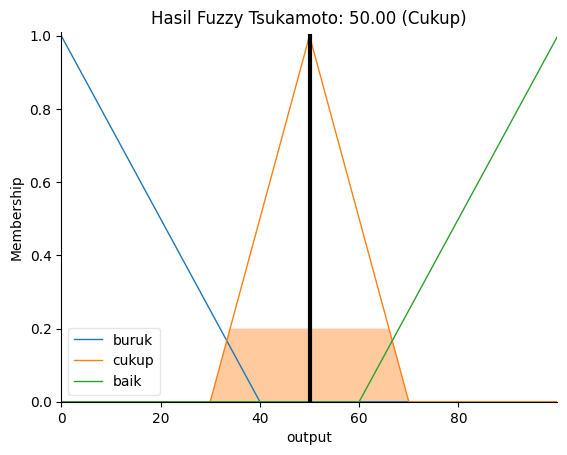

In [23]:
# Visualisasi grafik
output.view(sim=fuzzy_system)
plt.title(f'Hasil Fuzzy Tsukamoto: {result:.2f} ({category})')
plt.show()